# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Задание:" data-toc-modified-id="Задание:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание:</a></div><div class="lev3 toc-item"><a href="#Проверить-работу-реализованного-алгоритма-с-различным-числом-кластеров:" data-toc-modified-id="Проверить-работу-реализованного-алгоритма-с-различным-числом-кластеров:-101"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Проверить работу реализованного алгоритма с различным числом кластеров:</a></div><div class="lev3 toc-item"><a href="#За-выполнение-ДЗ:" data-toc-modified-id="За-выполнение-ДЗ:-102"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>За выполнение ДЗ:</a></div>

In [59]:
import numpy as np
import random

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

# Задание:

Реализовать алгоритм кластеризации k-means

In [91]:
class KMeans:
    def __init__(self, n_clusters=2, metric='euclidean', max_iter=300):
        '''
        n_clusters - число кластеров
        metric - метрика
        max_iter - максимальное число итераций
        '''
        self.n_clusters = n_clusters
        self.metric = metric
        self.max_iter = max_iter

    @staticmethod
    def distance(point, centroid):
        '''
        Определяем функцию расстояния
        Вычислим вектор расстояний между вектором точек и вектором центров
        '''
        dis = []
        for index in range(len(point)):
            dis.append((float(point[index]) - float(centroid[index]))**2)

        ''' Суммирую значения '''
        num = 0
        for point in dis:
            num += point

        return num # num = (A1 - A2)^2 + (B1 - B2)^2 + ...
        
        
    
    def predict(self, X):
        '''
        Предсказываем попадание объектов из X в конкретный кластер
        '''
        ans = [] # список номеров кластеров, куда попал i-тый элемент из X
        for item in X:
            claster_id = 0
            min_dist = 1000000
            for i in range(self.n_clusters):
                if self.distance(item, self.centers[i]) < min_dist:
                    min_dist = self.distance(item, self.centers[i])
                    claster_id = i
            ans.append(claster_id)
        return ans
    

    def fit(self, X):  
        '''
        Шаг 1 - Инизиализируем начальные положения центров кластеров

        '''
        centroids = []
        centroids_sz = [] # количество элементов в кластере
        for i in range(self.n_clusters):
            centroids.append(X[random.randint(0, len(X) - 1)])
            centroids_sz.append(1)

        '''
        Шаг 2 - Выполняем уточнение положения центров кластеров до тех пор, пока 
        не будет превышено значение max_iter или центры кластеров не будут меняться 
        '''
        dist_to_centr = [] # расстояние точки до каждого центра 
        for step in range(self.max_iter):            
            '''
            Шаг 2.1 - Вычисляем расстояние до цетров кластеров
            Шаг 2.2 - Для каждого объекта находим argmin от расстояний до центров 
            '''
            
            for item in range(len(X)):
                argmin_id = 0
                argmin = 1000000
                for i in range(self.n_clusters):
                    if self.distance(X[item], centroids[i]) < argmin:
                        argmin_id = i
                        argmin = self.distance(X[item], centroids[i])                
                '''
                Шаг 2.3 - Уточняеням положения центров кластеров
                Изменение координат выбранного кластера
                Шаг 3 - Сохраняем положения центров кластеров
                '''
                centroids_sz[argmin_id] += 1
                for i in range(len(centroids[argmin_id])):
                    centroids[argmin_id][i] = float(centroids[argmin_id][i] + X[item][i]) / float(centroids_sz[argmin_id])
        
        self.centers = centroids
        '''
        Шаг 4 - Возвращяем предсказание
        '''        
        return self.predict(X)

In [106]:
''' Проверяем работу алгоритма для наборов данных'''
data = []
for str in open('dataset2.csv'):
    str_x, str_y = str.strip().split('\t')
    data.append([float(str_x), float(str_y)])
num_clusters = 10
kmeans = KMeans(n_clusters = num_clusters, metric='euclidean', max_iter=300).fit(data)
ans = kmeans
#ans = kmeans.predict(data) predict() уже выполняется в kmeans


In [107]:
x = []
y = []
for i in range(num_clusters):
    x.append([])
    y.append([])
for i in range(len(ans)):
    x[ans[i]].append(data[i][0])
    y[ans[i]].append(data[i][1])


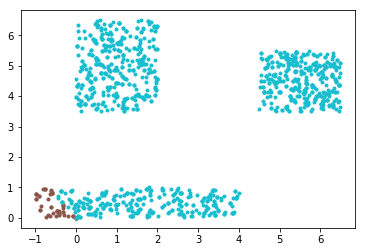

In [112]:
for i in range(num_clusters):
    plt.plot(x[i], y[i], '.')

### Проверить работу реализованного алгоритма с различным числом кластеров:
* Для тестовых наборов данных (dataset1, dataset2, dataset3)
* Для задачи кластеризации цветов на изображении (пример в k-means_photo_clusterization)

### За выполнение ДЗ: 
* 6 баллов за реализацию алгоритма
* +2 балла за возможность выбора метрики
    - Евклидово расстояние
    - Расстояние Чебышева
    - Манхэттенское расстояние